In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import plotly.express as px
import osmnx as ox
import networkx as nx

from ortools.constraint_solver import pywrapcp, routing_enums_pb2 

In [142]:
df = pd.read_csv('../data/starbucks.csv')

country = 'CA'
city = 'Toronto'
features = ['City', 'Street Address', 'Longitude', 'Latitude']

df = df[(df['Country'] == country) & (df['City'] == city)][features].reset_index(drop=True).rename(columns={'Longitude': 'x', 'Latitude': 'y'}).copy()

df['color'] = 'red'
df.loc[1, 'color'] = 'blue'

df = df.head(20)

start = tuple(df.loc[0, ['y', 'x']])
print(f"Starting point: {start}")

Starting point: (np.float64(43.66), np.float64(-79.38))


In [143]:
m = folium.Map(
    location=start,
    titles='cartodbpositron',
    zoom_start=12
)

df.apply(
    lambda row: folium.CircleMarker(
        location=[row['y'], row['x']],
        radius = 5,
        color=row['color'],
        fill=True,
    ).add_to(m),
    axis=1
)

m


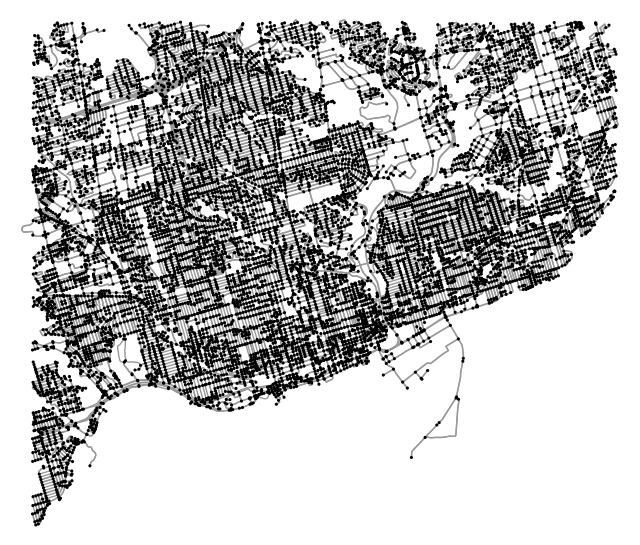

In [148]:
G = ox.graph_from_point(start, dist=10000, network_type='drive')
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

fig, ax = ox.plot_graph(G, bgcolor='white', node_size=5, node_color='black')
